In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_excel("employee.xlsx")

In [3]:
data

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


In [4]:
data.Salary.fillna(data.Salary.mean(), inplace=True)

In [5]:
data

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
9,10,2156,Engineer,Production,45.0,89000.0


In [6]:
np.percentile(data.Salary, 25)

89000.0

<Axes: ylabel='Salary'>

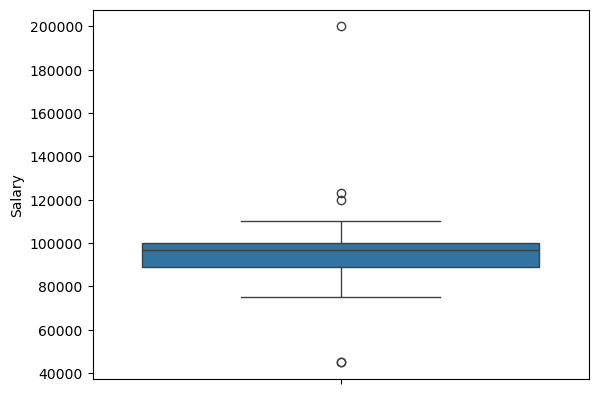

In [8]:
sns.boxplot(data.Salary)

In [10]:
q1 = np.percentile(data.Salary, 25)
q1

89000.0

In [11]:
q2 = np.percentile(data.Salary, 50)
q2

97000.0

In [12]:
q3 = np.percentile(data.Salary, 75)
q3

100000.0

In [13]:
q4 = np.percentile(data.Salary, 100)
q4

200000.0

In [14]:
iqr = q3 - q1
iqr

11000.0

upperfence , lowerfence

In [15]:
lf, uf = q1 - 1.5*iqr , q3 + 1.5*iqr

In [17]:
lf, uf

(72500.0, 116500.0)

In [18]:
outliers = data[(data.Salary < lf) | (data.Salary > uf)]

In [19]:
outliers

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


<Axes: ylabel='Salary'>

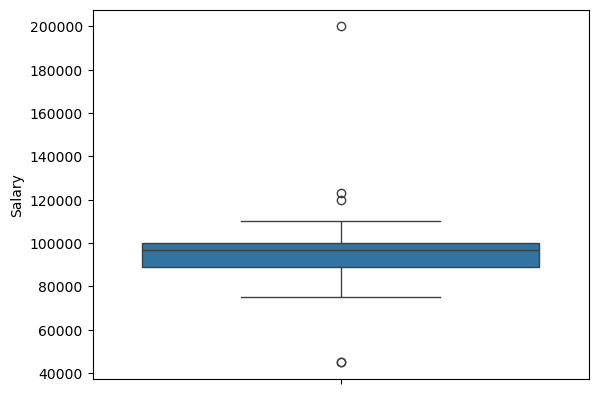

In [20]:
sns.boxplot(data.Salary)

### Outliers on Ages

<Axes: ylabel='Age'>

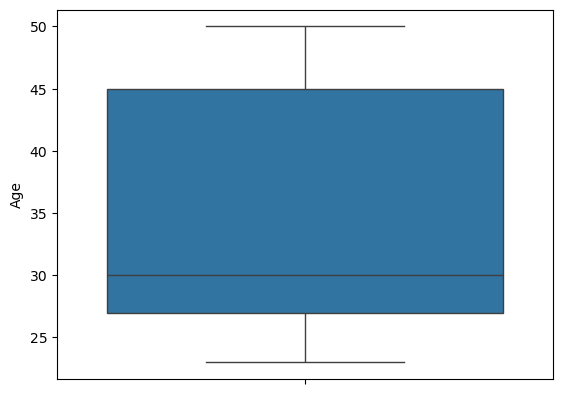

In [21]:
sns.boxplot(data.Age)

In [42]:
data.Age.fillna(99, inplace=True)
data.Age.isna().sum()

0

<Axes: ylabel='Age'>

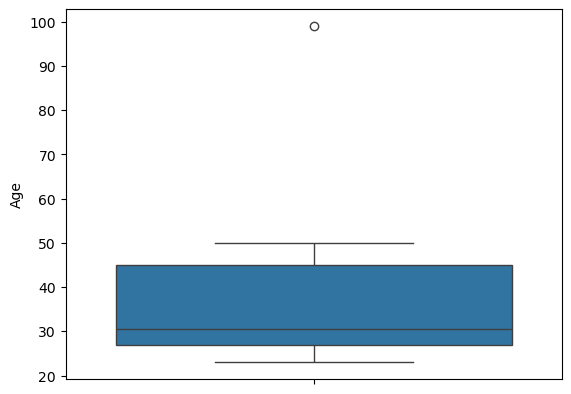

In [26]:
sns.boxplot(data.Age)

In [35]:
aq1 = np.percentile(data.Age, 25)
aq1

27.0

In [36]:
aq2 = np.percentile(data.Age, 50)
aq2

30.5

In [37]:
aq3 = np.percentile(data.Age, 75)
aq3

45.0

In [38]:
aiqr = aq3 - aq1
aiqr

18.0

In [39]:
lower_bound , upper_bound = aq1 - 1.5*aiqr , aq3 + 1.5*aiqr
lower_bound, upper_bound

(0.0, 72.0)

In [45]:
age_outliers = data[(data.Age < lower_bound) | (data.Age > upper_bound)]
#age_outliers

data.Age[data.Age > upper_bound]

6    99.0
Name: Age, dtype: float64

### Create Function to detect outlier

In [61]:
data

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,99.0,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
9,10,2156,Engineer,Production,45.0,89000.0


In [97]:
def detect_outliers(df, column):
    if(column.isna().sum() > 0):
        column = column.fillna(column.mean(skipna=True))
    q1, q2, q3 = np.percentile(column, 25), np.percentile(column, 50), np.percentile(column, 75)
    iqr = q3 - q1
    lb , ub = q1-1.5*iqr, q3+1.5*iqr
    print(lb , ub)
    return df[(column < lb) | (column > ub)]

In [102]:
detect_outliers(data, data.Salary)

72500.0 116500.0


,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


In [99]:
car_data = pd.read_csv("cleaned_car_data.csv")

In [100]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  724 non-null    int64 
 1   name        724 non-null    object
 2   company     724 non-null    object
 3   year        724 non-null    int64 
 4   Price       724 non-null    int64 
 5   kms_driven  724 non-null    int64 
 6   fuel_type   724 non-null    object
dtypes: int64(4), object(3)
memory usage: 39.7+ KB


In [101]:
detect_outliers(car_data, car_data.Price)

-322498.5 977497.5


,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
12,16,Audi A8,Audi,2017,1000000,4000,Petrol
41,49,Mitsubishi Pajero Sport,Mitsubishi,2015,1475000,47000,Diesel
52,73,Mini Cooper S,Mini,2013,1891111,13000,Petrol
56,79,Mini Cooper S,Mini,2013,1891111,13500,Petrol
62,86,Volkswagen Vento Highline,Volkswagen,2019,1200000,3600,Diesel
75,100,BMW 7 Series,BMW,2009,1600000,35000,Petrol
118,146,Mahindra Scorpio,Mahindra,2015,984999,22000,Diesel
188,231,Mercedes Benz GLA,Mercedes,2015,2000000,20000,Diesel
189,232,Land Rover Freelander,Land,2015,2100000,30000,Diesel
192,235,Mercedes Benz B,Mercedes,2014,1400000,31000,Petrol
